# Métodos Numéricos 2019.1
## Patric Lacouth
### lacouth@gmail.com

## Raízes

Há muito tempo,  você aprendeu a usar a fórmula quadrática

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

para resolver

$$ f(x) = ax^2 + bx + c = 0 $$

Os valores calculados na primeira equação são chamados "raízes" e representam os valores de x que tornam a segunda  igual a zero.

## Objetivos

* Traçar gráficos das funções.
* Aprender o método da busca incremental e suas deficiências.
* Aprender o método da bisseção.

# Gráficos no jupyter notebook

1. Importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2. Criando a faixa de valores onde a função será calculada

In [17]:
x = np.arange(3,6,0.1) # de 3 até 6 com incremento de 0.1
x

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9])

3. Gerando os valores da função
$$ f(x) = sen(10x) + cos(3x) $$

In [18]:
fx = np.sin(10*x)+np.cos(3*x)
fx

array([-1.89916189, -1.39626297, -0.43326117,  0.11072071, -0.18518297,
       -0.9037196 , -1.18610876, -0.53930211,  0.68985945,  1.61139172,
        1.58896712,  0.80610995,  0.08291304,  0.1130853 ,  0.82358588,
        1.44582419,  1.23260323,  0.16073151, -1.02807202, -1.48733704,
       -1.02206277, -0.2477016 , -0.00755003, -0.58569239, -1.44016154,
       -1.70215223, -0.98222959,  0.25835568,  1.11381625,  1.04563075])

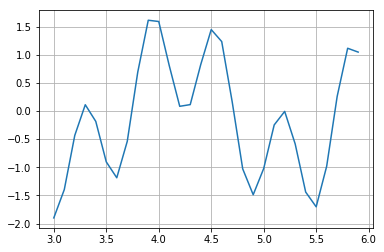

In [19]:
plt.plot(x,fx)
plt.grid(True)
plt.show()

# Como determinar quantas raízes existem ?

## A busca incremental

1. Dado um intervalo, se $f(x)$ mudar de sinal então existem pelo menos uma raiz
$$ f(x_1)f(x_2) < 0 $$

2. Se o "incremento" da busca for muito grande existe a possibilidade de que as raízes sejam perdidas
3. Se o "incremento" da busca for muito pequeno a busca pode demorar muito


## O algoritmo

* Dado um intervalo e um "incremento"/passo, a cada troca de sinal o subintervalo e salvo em um *array*

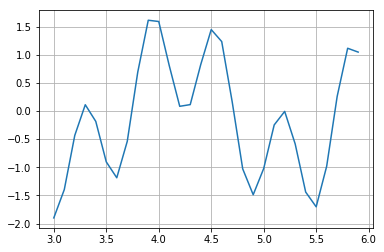

In [19]:
plt.plot(x,fx)
plt.grid(True)
plt.show()

## Definindo a função

In [7]:
def sen10_cos3(x):
    return np.sin(10*x)+np.cos(3*x)

## A busca incremental

In [6]:
def busca_incremental(funcao, xmin, xmax, passo = 0.1):
    x = np.arange(xmin, xmax, passo)
    subintervalos = []
    for xi in x:
        if funcao(xi)*funcao(xi+passo) < 0:
            subintervalos.append([xi,xi+passo])
    return subintervalos   

## Aplicando o algoritmo

In [27]:
intervalos = busca_incremental(sen10_cos3,3,6,0.5)
print('Foram encontrados {} subintervalos: '.format(len(intervalos)))
intervalos

Foram encontrados 3 subintervalos: 


[[3.5, 4.0], [4.5, 5.0], [5.5, 6.0]]

# Método da Bisseção

* É uma variação do método da busca incremental
* O intervalo é sempre dividido ao meio (busca binária)

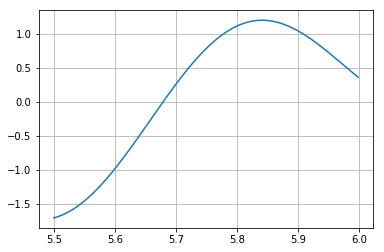

In [29]:
x = np.arange(5.5, 6, 0.001)
fx = sen10_cos3(x)
plt.plot(x,fx)
plt.grid(True)
plt.show()

# Critérios de parada

* Número de iterações
* Estimativa de erro

## Erro de aproximação

$$ | \varepsilon_a | = \left | \frac{x^{novo}_r - x^{velho}_r }{x^{novo}_r} \right| 100% $$

onde $ x^{novo}_r $ é a raiz da iteração atual e $x^{velho}_r$ é a raiz da iteração prévia. Quando $|\varepsilon_a|$ torna-se menor que um critério de parada pré-especificado, $|\varepsilon_s|$, param-se os cálculos.

# Now go code!